# Scikit-Learn Basics

In [1]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


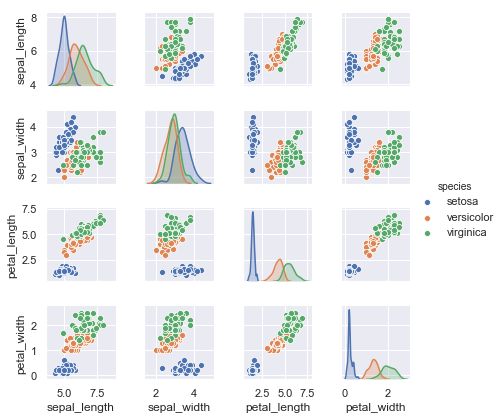

In [6]:
sns.set()
sns.pairplot(iris, hue='species',height=1.5)

In [7]:
X_iris = iris.drop('species',axis=1)
X_iris.shape

(150, 4)

In [8]:
y_iris = iris['species']
y_iris.shape

(150,)

## Scikit-Learn's Estimator API
* *Consistency:* All objects share a common interface drawn from a limited set of methods, with consistent information.
* *Inspection:* All specified parameter values are exposed as public attributes
* *Limited object hierarchy:* Only algorithms are represented by Python classes; datasets are represented in standard format (arrays, datasets or sparse matrices) and parameter names use standard Python strings
* *Composition:* Many machine learning tasks can be expressed as sequences of more fundamental algorithms, and Scikit-learn makes use of this whenever possible.
* *Sensible defaults:* When models require user-specified parameters, the library defines an appropriate default value

### Basics of the API

1. Choose a class of model by importing the appropriate estimator class from Scikit-Learn
2. Choose model hyperparameters by instantiating this class with desired values
3. Arrange data into a features matrix and target vector
4. Fit the model to your data by calling the fit() method of the model instance
5. Apply the model to new data
  * For supervised learning, often we predict labels for unknown data using the predict() method
  * For unsupervised learning, we often transform or infer properties of the data using the transform() or predict() method

### Simple Linear Regression

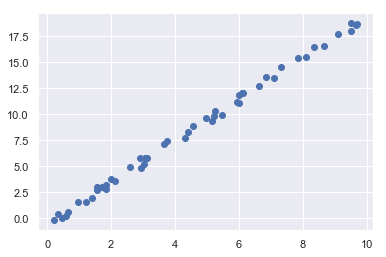

In [11]:
rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.rand(50)
plt.scatter(x, y)

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
# arranging feature matrix
X = x[:, np.newaxis]
X.shape

(50, 1)

In [18]:
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
# all model parameters have trailing underscores
print("Model Coef:", model.coef_)
print("Model Intercept:", model.intercept_)

Model Coef: [2.00660766]
Model Intercept: -0.5350275750800026


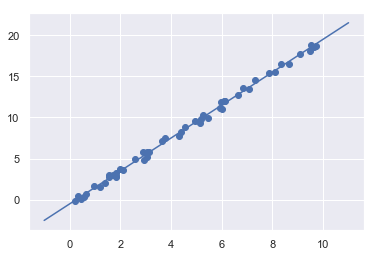

In [21]:
# predict labels for the unknown data
xfit = np.linspace(-1,11)
Xfit = xfit[:,np.newaxis]
yfit = model.predict(Xfit)
plt.scatter(x,y)
plt.plot(xfit,yfit)

### Supervised learning: Iris classification

In [25]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state=1)

In [26]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [27]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9736842105263158

### Unsupervised learning: Iris dimensionality

In [28]:
from sklearn.decomposition import PCA
model = PCA(n_components=2)
model.fit(X_iris)
X_2D = model.transform(X_iris)

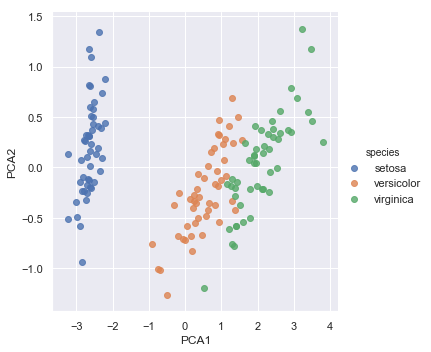

In [30]:
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot('PCA1','PCA2', hue='species',data=iris,fit_reg=False)

### Unsupervised learning: Iris clustering

In [33]:
from sklearn.mixture import GaussianMixture
model = GaussianMixture(n_components=3, covariance_type='full')
model.fit(X_iris)
y_gmm = model.predict(X_iris)

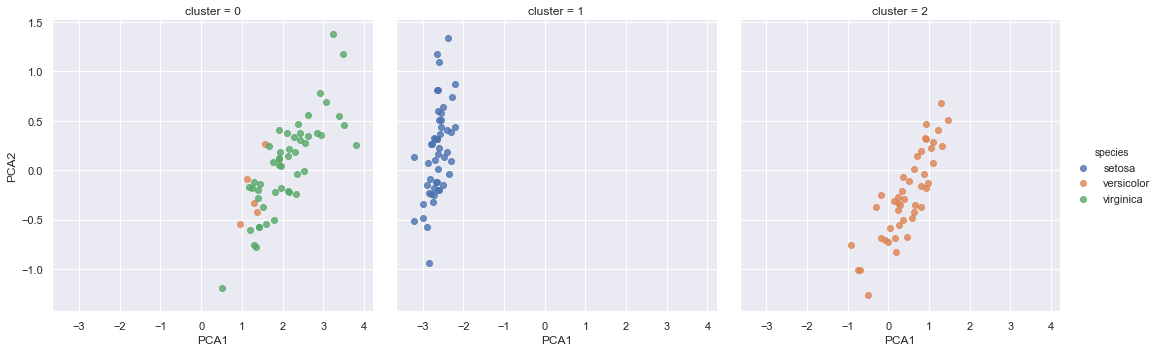

In [34]:
iris['cluster'] = y_gmm
sns.lmplot('PCA1','PCA2',data=iris,hue='species',col='cluster',fit_reg=False)

## Exploring Handwritten Digits

In [35]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

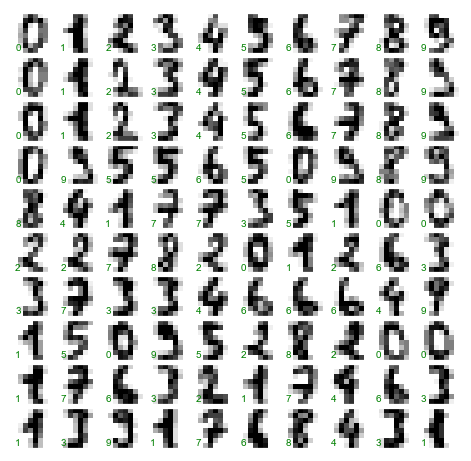

In [37]:
fig, axes = plt.subplots(10,10,figsize=(8,8), subplot_kw={'xticks':[],'yticks':[]}, gridspec_kw=dict(hspace=0.1,wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary',interpolation='nearest')
    ax.text(0.05,0.05, str(digits.target[i]), transform=ax.transAxes, color='green')

In [41]:
X = digits.data
y = digits.target
print("X shape:", X.shape)
print("Y shape:",y.shape)
print("We see here that there are 1,797 samples and 64 features.")

X shape: (1797, 64)
Y shape: (1797,)
We see here that there are 1,797 samples and 64 features.


### Dimensionality reduction

In [42]:
# going from 64 dimensions to 2 using Manifold Learning
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

(1797, 2)

Groups appear fairly well delimited, so a straightforward supervised classification algorithm should perform suitably on this data


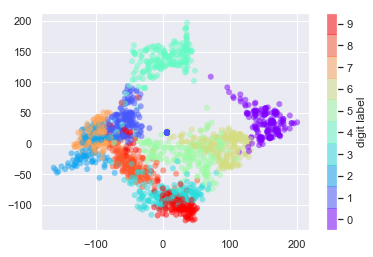

In [48]:
plt.scatter(data_projected[:,0], data_projected[:,1], c=digits.target, edgecolor='none',alpha=0.5,cmap=plt.cm.get_cmap('rainbow',10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5)
print("Groups appear fairly well delimited, so a straightforward supervised classification algorithm should perform suitably on this data")

### Classification on digits

In [50]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,random_state=0)
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain,ytrain)
y_model = model.predict(Xtest)

In [51]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.8333333333333334

Text(89.18, 0.5, 'true value')

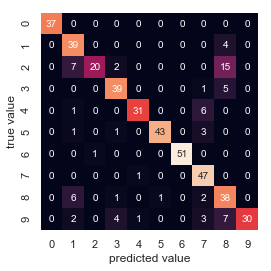

In [53]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, y_model)
sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value')

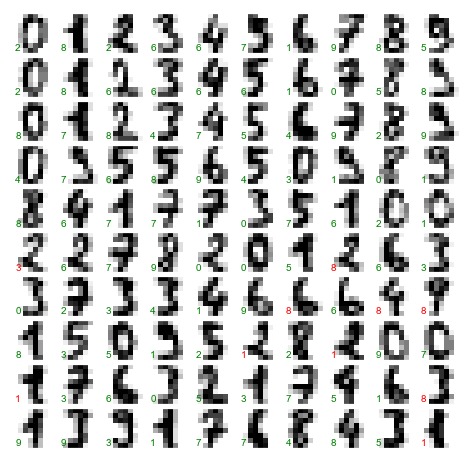

In [56]:
fig, axes = plt.subplots(10, 10, figsize=(8,8),subplot_kw={'xticks':[],'yticks':[]}, gridspec_kw=dict(hspace=0.1,wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05,0.05,str(y_model[i]), transform=ax.transAxes, color='green' if (ytest[i] == y_model[i]) else 'red')